In [319]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [322]:
!ls save
!ls /data/save

light2_model   light45_model  light52_model  light60_model  normal3_model
light3_model   light50_model  light56_model  model_W4G3
light44_model  light51_model  light57_model  normal2_model
hvae_lj_parallel18_1_LA     hvae_lj_parallel18_4_LA  model_S5G
hvae_lj_parallel18_1_LA_32  hvae_lj_parallel18_5_LA  model_W4G3
hvae_lj_parallel18_1_RZLA   light57_model	     model_W5G
hvae_lj_parallel18_2_LA     light60_model	     tts_add_kss_3_g2p
hvae_lj_parallel18_2_LA_32  model_S4G
hvae_lj_parallel18_3_LA     model_S4L


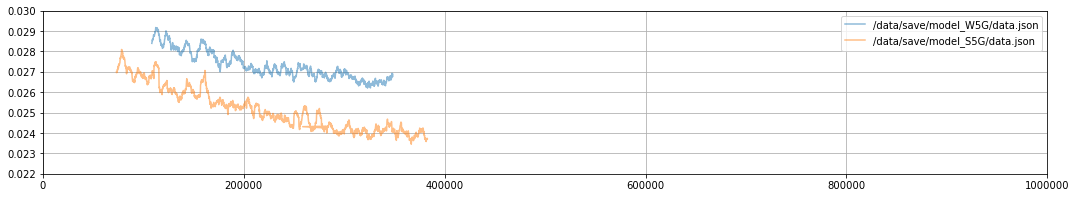

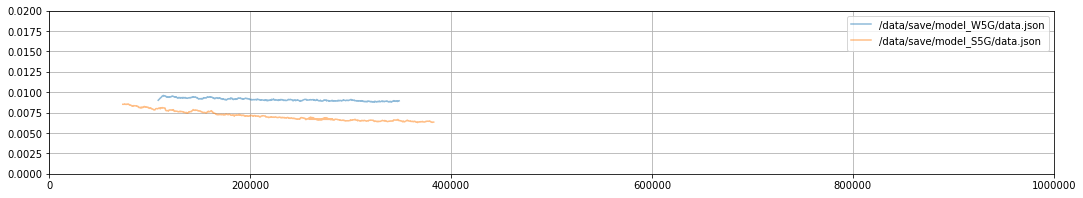

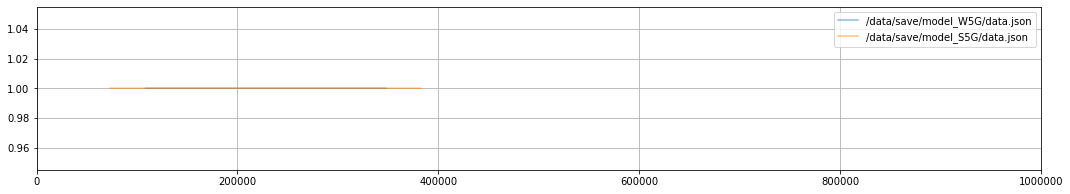

In [545]:
dirs = ['/data/save/model_W5G/data.json',
        '/data/save/model_S5G/data.json',
       ]

N = 1000000

loss_list = []
for dir in dirs:
    with open(dir, 'r') as f:
        loss = np.array(json.load(f)['recon_loss'])
        loss[:, 1] = np.clip(loss[:, 1], a_min=0, a_max=2.0)
        loss_list.append(loss)
    
def moving_average(data_set, periods=50):
    weights = np.ones(periods) / periods
    data_set = np.pad(data_set, (periods-1, 0), mode='edge')
    return np.convolve(data_set, weights, mode='valid')

plt.figure(figsize=[18, 3])
for dir, loss in zip(dirs, loss_list):
    plt.plot(loss[:, 0], moving_average(loss[:, 1]), label=dir, alpha=0.5)
    
plt.xlim([0, N])
plt.ylim([0.022, 0.030])
plt.grid()
plt.legend()
plt.show()

loss_list = []
for dir in dirs:
    with open(dir, 'r') as f:
        loss = np.array(json.load(f)['kl_loss'])
        loss[:, 1] = np.clip(loss[:, 1], a_min=0, a_max=2.0)
        loss_list.append(loss)
    
plt.figure(figsize=[18, 3])
for dir, loss in zip(dirs, loss_list):
    plt.plot(loss[:, 0], moving_average(loss[:, 1]), label=dir, alpha=0.5)
    
plt.xlim([0, N])
plt.ylim([0.00, 0.02])
plt.grid()
plt.legend()
plt.show()

loss_list = []
for dir in dirs:
    with open(dir, 'r') as f:
        loss = np.array(json.load(f)['beta'])
        loss[:, 1] = np.clip(loss[:, 1], a_min=0, a_max=2.0)
        loss_list.append(loss)
    
plt.figure(figsize=[18, 3])
for dir, loss in zip(dirs, loss_list):
    plt.plot(loss[:, 0], loss[:, 1], label=dir, alpha=0.5)
    
plt.xlim([0, N])
#plt.ylim([0.0, 1.1])
plt.grid()
plt.legend()
plt.show()

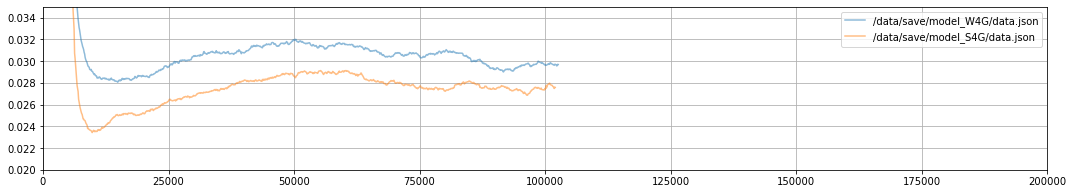

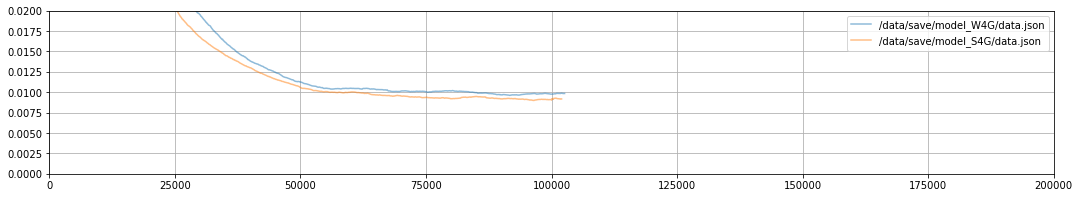

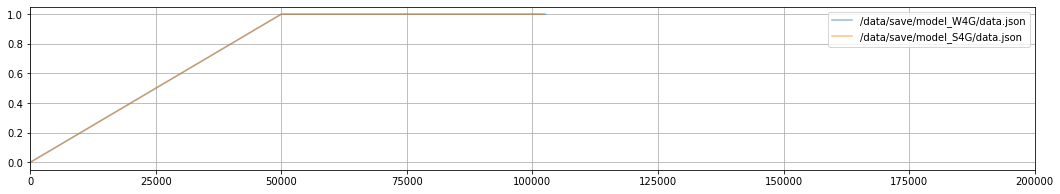

In [414]:
dirs = ['/data/save/model_W4G/data.json',
        '/data/save/model_S4G/data.json',
       ]

N = 200000

loss_list = []
for dir in dirs:
    with open(dir, 'r') as f:
        loss = np.array(json.load(f)['recon_loss'])
        loss[:, 1] = np.clip(loss[:, 1], a_min=0, a_max=2.0)
        loss_list.append(loss)
    
def moving_average(data_set, periods=50):
    weights = np.ones(periods) / periods
    data_set = np.pad(data_set, (periods-1, 0), mode='edge')
    return np.convolve(data_set, weights, mode='valid')

plt.figure(figsize=[18, 3])
for dir, loss in zip(dirs, loss_list):
    plt.plot(loss[:, 0], moving_average(loss[:, 1]), label=dir, alpha=0.5)
    
plt.xlim([0, N])
plt.ylim([0.02, 0.035])
plt.grid()
plt.legend()
plt.show()

loss_list = []
for dir in dirs:
    with open(dir, 'r') as f:
        loss = np.array(json.load(f)['kl_loss'])
        loss[:, 1] = np.clip(loss[:, 1], a_min=0, a_max=2.0)
        loss_list.append(loss)
    
plt.figure(figsize=[18, 3])
for dir, loss in zip(dirs, loss_list):
    plt.plot(loss[:, 0], moving_average(loss[:, 1]), label=dir, alpha=0.5)
    
plt.xlim([0, N])
plt.ylim([0.00, 0.02])
plt.grid()
plt.legend()
plt.show()

loss_list = []
for dir in dirs:
    with open(dir, 'r') as f:
        loss = np.array(json.load(f)['beta'])
        loss[:, 1] = np.clip(loss[:, 1], a_min=0, a_max=2.0)
        loss_list.append(loss)
    
plt.figure(figsize=[18, 3])
for dir, loss in zip(dirs, loss_list):
    plt.plot(loss[:, 0], loss[:, 1], label=dir, alpha=0.5)
    
plt.xlim([0, N])
#plt.ylim([0.0, 1.1])
plt.grid()
plt.legend()
plt.show()

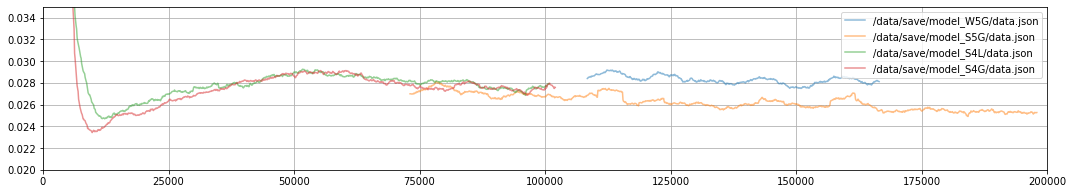

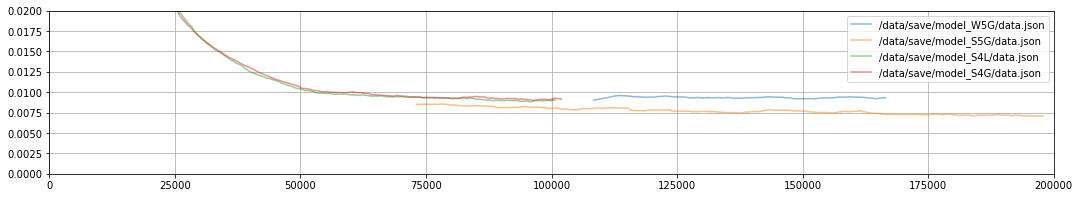

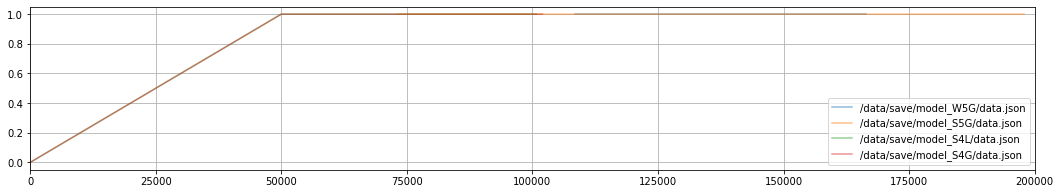

In [413]:
dirs = ['/data/save/model_W5G/data.json',
        '/data/save/model_S5G/data.json',
        #'save/light57_model/data.json',
        '/data/save/model_S4L/data.json',
        '/data/save/model_S4G/data.json',
       ]

N = 200000

loss_list = []
for dir in dirs:
    with open(dir, 'r') as f:
        loss = np.array(json.load(f)['recon_loss'])
        loss[:, 1] = np.clip(loss[:, 1], a_min=0, a_max=2.0)
        loss_list.append(loss)
    
def moving_average(data_set, periods=50):
    weights = np.ones(periods) / periods
    data_set = np.pad(data_set, (periods-1, 0), mode='edge')
    return np.convolve(data_set, weights, mode='valid')

plt.figure(figsize=[18, 3])
for dir, loss in zip(dirs, loss_list):
    plt.plot(loss[:, 0], moving_average(loss[:, 1]), label=dir, alpha=0.5)
    
plt.xlim([0, N])
plt.ylim([0.02, 0.035])
plt.grid()
plt.legend()
plt.show()

loss_list = []
for dir in dirs:
    with open(dir, 'r') as f:
        loss = np.array(json.load(f)['kl_loss'])
        loss[:, 1] = np.clip(loss[:, 1], a_min=0, a_max=2.0)
        loss_list.append(loss)
    
plt.figure(figsize=[18, 3])
for dir, loss in zip(dirs, loss_list):
    plt.plot(loss[:, 0], moving_average(loss[:, 1]), label=dir, alpha=0.5)
    
plt.xlim([0, N])
plt.ylim([0.00, 0.02])
plt.grid()
plt.legend()
plt.show()

loss_list = []
for dir in dirs:
    with open(dir, 'r') as f:
        loss = np.array(json.load(f)['beta'])
        loss[:, 1] = np.clip(loss[:, 1], a_min=0, a_max=2.0)
        loss_list.append(loss)
    
plt.figure(figsize=[18, 3])
for dir, loss in zip(dirs, loss_list):
    plt.plot(loss[:, 0], loss[:, 1], label=dir, alpha=0.5)
    
plt.xlim([0, N])
#plt.ylim([0.0, 1.1])
plt.grid()
plt.legend()
plt.show()